<a href="https://colab.research.google.com/github/naveen270906/git/blob/main/VegetableClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/archive.zip

/content/archive.zip


In [3]:
!unzip /content/archive.zip -d /content/vegedataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0001.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0002.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0003.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0004.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0005.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0006.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0007.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0008.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0009.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0010.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0011.jpg  
  inflating: /content/vegedataset/Vegetable Images/train/Radish/0012.jpg  
  inflating: /content/vegedataset/Vegetable Image

In [12]:
#data importing

import tensorflow as tf

train_dir="/content/vegedataset/VegetableImages/train"
test_dir="/content/vegedataset/VegetableImages/test"
val_dir="/content/vegedataset/VegetableImages/validation"

img_size=(224,224)
batch_size=128

train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,image_size=img_size,batch_size=batch_size
)

test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,image_size=img_size,batch_size=batch_size
)

val_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,image_size=img_size,batch_size=batch_size
)



Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [7]:
print("Class names:", train_dataset.class_names)

Class names: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


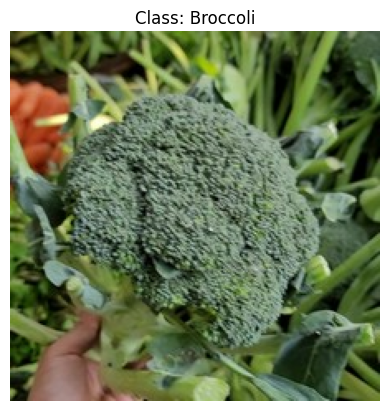

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images
for images, labels in train_dataset.take(1):  # Take one batch
    img = images[0].numpy().astype("uint8")  # Convert tensor to NumPy
    label = train_dataset.class_names[labels[0].numpy()]  # Get class name

    # Show image
    plt.imshow(img)
    plt.title(f"Class: {label}")
    plt.axis("off")
    plt.show()
    break  # Show only one image


In [14]:
from tensorflow import keras
from tensorflow.keras import layers


data_augmentation=keras.Sequential([
      layers.Rescaling(1./255),
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.2),

])

train_dataset=train_dataset.map(lambda x,y:(data_augmentation(x),y))
test_dataset=test_dataset.map(lambda x,y:(x/255.0,y))
val_dataset=val_dataset.map(lambda x,y:(x/255.0,y))

In [15]:


from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

model=keras.Sequential([
    #layer1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu' ),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,212,006 (12.25 MB)

 Trainable params: 3,212,006 (12.25 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history=model.fit(train_dataset,epochs=10,validation_data=val_dataset)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.1048 - loss: 3.0670 - val_accuracy: 0.3183 - val_loss: 1.8740
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.3533 - loss: 1.8825 - val_accuracy: 0.5553 - val_loss: 1.3093
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.4831 - loss: 1.4819 - val_accuracy: 0.6530 - val_loss: 0.9755
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5818 - loss: 1.1884 - val_accuracy: 0.7347 - val_loss: 0.7667
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.6464 - loss: 1.0094 - val_accuracy: 0.7083 - val_loss: 0.7825
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7127 - loss: 0.8508 - val_accuracy: 0.8050 - val_loss: 0.5540
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7573 - loss: 0.6965 - val_accuracy: 0.8710 - val_loss: 0.4149
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7875 - loss: 0.6387 - val_accu

In [17]:
model.save("vegetableclassifier.h5")

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9154 - loss: 0.2870
Test Loss: 0.2680
Test Accuracy: 0.9207


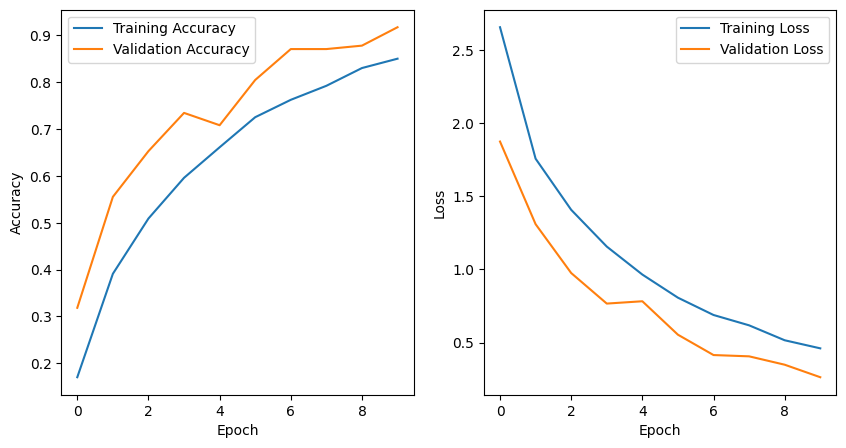

In [25]:
# prompt: evaluate the model

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
# prompt: to predict the given image

import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image

# Load the saved model
model = keras.models.load_model("vegetableclassifier.h5")

# Replace 'path/to/your/image.jpg' with the actual path to your image file
img_path = '/content/papaya.webp'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Assuming you have class names available (e.g., from train_dataset.class_names)
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato'] # Replace with your actual class names

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]


print(f"Predicted class: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
Predicted class: Capsicum


In [29]:
# prompt: give code so that i can open file explorer and select image and predict it

from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# ... (Your existing code) ...

# Load the saved model
model = keras.models.load_model("vegetableclassifier.h5")

# Function to predict the class of an uploaded image
def predict_image():
    uploaded = files.upload()
    for fn in uploaded.keys():
        img_path = fn  # Use the uploaded file name as the path

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize the image

        # Make predictions
        predictions = model.predict(img_array)

        # Get the predicted class index
        predicted_class_index = np.argmax(predictions[0])

        class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato'] # Replace with your actual class names

        # Get the predicted class name
        predicted_class_name = class_names[predicted_class_index]

        print(f"Predicted class: {predicted_class_name}")


# Call the function to upload and predict
predict_image()


Saving 1056.jpg to 1056.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Predicted class: Tomato
